# Predicting NYC Taxis Tipping Behavior

## Aim :
Using Machine Learning to predicting the tipping behaviors of New-York City taxis.

## Data :
The data consist of two csv files gotten from [Mark Kromer Github's](https://github.com/kromerm/adfdataflowdocs/blob/master/sampledata) account.

- trip_fare_1.csv
- trip_data_1.csv

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score
from pylab import *




sns.set_style('darkgrid')

## Loading Data

In [3]:
path = '../data'
!ls {path}

 bluebook-for-bulldozers   california   titanic		  wine
 boston			   pandas       trip_data_1.csv
'breast cancer'		   spam_2       trip_fare_1.csv


In [4]:
N = 5e6
data = pd.read_csv(path+'/trip_data_1.csv', sep=',', nrows=N)
fare = pd.read_csv(path+'/trip_fare_1.csv', sep=',', nrows=N)
fare_cols = [u' payment_type', u' fare_amount', u' surcharge', u' mta_tax', 
             u' tip_amount', u' tolls_amount', u' total_amount']

In [5]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [6]:
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [7]:
df = data.join(fare[fare_cols])
df.columns = df.columns.str.strip()

## Visualizing the data

In [8]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,40.757977,-73.989838,40.751171,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,40.731781,-73.994499,40.750660,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,40.737770,-74.009834,40.726002,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,40.759945,-73.984734,40.759388,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,40.748528,-74.002586,40.747868,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   medallion           49999 non-null  object 
 1   hack_license        49999 non-null  object 
 2   vendor_id           49999 non-null  object 
 3   rate_code           49999 non-null  int64  
 4   store_and_fwd_flag  234 non-null    object 
 5   pickup_datetime     49999 non-null  object 
 6   dropoff_datetime    49999 non-null  object 
 7   passenger_count     49999 non-null  int64  
 8   trip_time_in_secs   49999 non-null  int64  
 9   trip_distance       49999 non-null  float64
 10  pickup_longitude    49999 non-null  float64
 11  pickup_latitude     49999 non-null  float64
 12  dropoff_longitude   49999 non-null  float64
 13  dropoff_latitude    49999 non-null  float64
 14  payment_type        49999 non-null  object 
 15  fare_amount         49999 non-null  float64
 16  surc

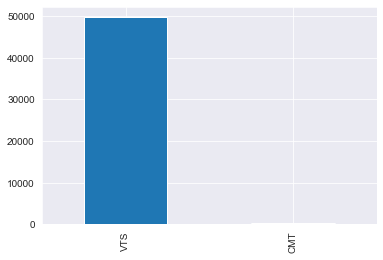

In [10]:
df['vendor_id'].value_counts().plot.bar()
plt.show()

In [11]:
df['vendor_id'].value_counts()

VTS    49765
CMT      234
Name: vendor_id, dtype: int64

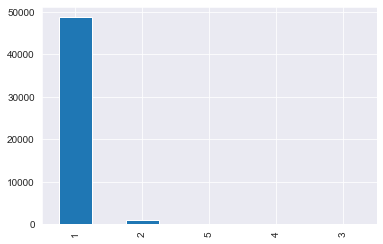

In [12]:
df['rate_code'].value_counts().plot.bar()
plt.show()

In [13]:
df['rate_code'].value_counts()

1    48740
2      984
5      125
4       76
3       74
Name: rate_code, dtype: int64

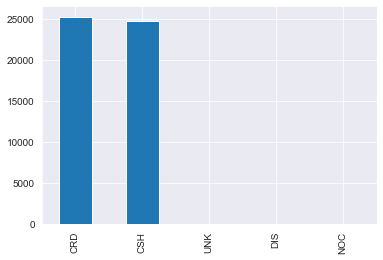

In [14]:
df['payment_type'].value_counts().plot.bar()
plt.show()

In [15]:
df['payment_type'].value_counts()

CRD    25258
CSH    24722
UNK       16
DIS        2
NOC        1
Name: payment_type, dtype: int64

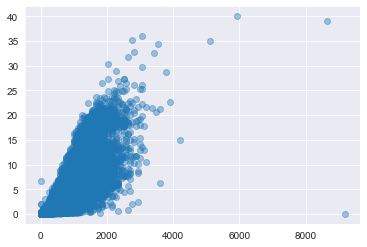

In [16]:
plt.scatter(df['trip_time_in_secs'], df['trip_distance'], alpha=0.4)
plt.show()

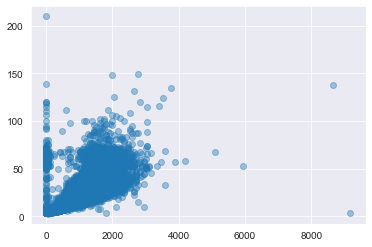

In [18]:
plt.scatter(df['trip_time_in_secs'], df['total_amount'], alpha=0.4)
plt.show()

## Defining the problem and preparing the data

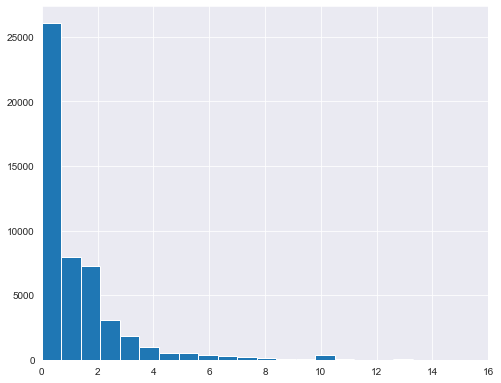

In [19]:
df['tip_amount'].hist(bins=100, figsize=(8, 6.5))
plt.xlim((0, 16))
plt.show()

In [20]:
def tipped_mapping(x:int)->int:
    """ Returns the either 0 or 1 depending on the tipp amount, 0 for tips equal to 0
    
    >>> tipped_mapping(2)
    1
    >>> tipped_mapping(0)
    0
    """
    if x > 0:
        return 1
    else :
        return 0
    
df['tipped'] = df['tip_amount'].map(lambda x : tipped_mapping(x))

In [21]:
df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tipped
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.00,...,-73.989838,40.751171,CSH,6.5,0.0,0.5,0.0,0.0,7.0,0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.50,...,-73.994499,40.750660,CSH,6.0,0.5,0.5,0.0,0.0,7.0,0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.10,...,-74.009834,40.726002,CSH,5.5,1.0,0.5,0.0,0.0,7.0,0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.70,...,-73.984734,40.759388,CSH,5.0,0.5,0.5,0.0,0.0,6.0,0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.10,...,-74.002586,40.747868,CSH,9.5,0.5,0.5,0.0,0.0,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,9026F6306A546DF55217CF854D7BD12D,660043AE9457CE04A3778E1B6BBFBFA7,VTS,1,NaN,2013-01-13 14:42:00,2013-01-13 15:00:00,1,1080,9.03,...,-73.870964,40.774078,CRD,26.5,0.0,0.5,5.3,4.8,37.1,1
49995,39C5EDFE45D18B3FBFB9C8A65B320F90,96A675C73D91A0B5F9ECFB03F6272663,VTS,1,NaN,2013-01-13 13:34:00,2013-01-13 13:50:00,1,960,3.38,...,-73.944832,40.783344,CRD,14.5,0.0,0.5,1.0,0.0,16.0,1
49996,1E65B587835F860087C91479FAFD7118,FAF24F3447E3D7EDBAB2F4F01BFEF76E,VTS,1,NaN,2013-01-13 13:46:00,2013-01-13 13:49:00,2,180,0.79,...,-73.991966,40.741528,CSH,4.5,0.0,0.5,0.0,0.0,5.0,0
49997,39F614477C0F60F6184A733BD20E7CB2,92046E4DE64475F31D68A0B1FEF71A99,VTS,1,NaN,2013-01-13 13:45:00,2013-01-13 13:52:00,5,420,0.84,...,-73.975540,40.755707,CSH,6.0,0.0,0.5,0.0,0.0,6.5,0


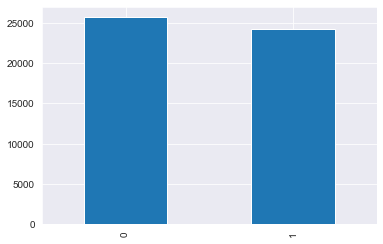

In [22]:
df['tipped'].value_counts().plot.bar()
plt.show()

In [23]:
feat1 = [column for column in df.columns if pd.api.types.is_numeric_dtype(df[column])]
feat1

['rate_code',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'tipped']

In [24]:
X, y = df[feat1].drop('tipped', axis=1), df['tipped']

In [27]:
X.shape, y.shape

((49999, 14), (49999,))

In [46]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape

((39999, 14), (10000, 14), (39999,))

## Baseline Model

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
sgd_clf = SGDClassifier().fit(X_train_scaled, y_train)
y_pred = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9979

In [58]:
score = cross_val_score(sgd_clf, X, y, scoring='accuracy', cv=5)
np.mean(score)

0.9940799479947995

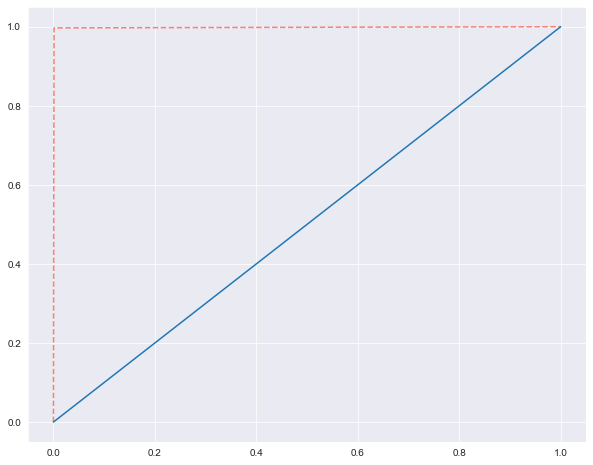

In [60]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, '--',color='salmon')
plt.plot([0,1], [0,1])
plt.show()